## 1.jieba分词

In [1]:
import jieba

In [2]:
seg_list = jieba.cut_for_search('今天的天气非常好')
print(list(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.063 seconds.
Prefix dict has been built successfully.


['今天', '的', '天气', '非常', '好']


In [4]:
jieba.load_userdict('NewsAnalysis/AIDict.txt')
words=jieba.cut('今天的天气非常好')
print(list(words))

['今天', '的', '天气', '非常好']


In [5]:
import jieba.posseg as pseg
words = pseg.cut('中华人民共和国国民经济和社会发展第十四个五年规划和2035年远景目标纲要')
for key in words:
    print(key.word, key.flag)

中华人民共和国 ns
国民经济 n
和 c
社会 n
发展 vn
第十四 m
个 q
五年 t
规划 n
和 c
2035 m
年 m
远景 n
目标 n
纲要 n


In [7]:
with open('NewsAnalysis/145.txt','r',encoding='utf-8') as f:
    gov = f.read()
jieba.load_userdict("NewsAnalysis/AIDict.txt")
seg_list = jieba.cut(gov,cut_all=False)

In [8]:
tf = {}
for seg in seg_list:
    if seg in tf:
        tf[seg]+=1
    else:
        tf[seg]=1
len(tf)

4888

In [9]:
ci = list(tf.keys())
ci

['\ufeff',
 '中华人民共和国',
 '国民经济',
 '和',
 '社会',
 '发展',
 '第十四',
 '个',
 '五年',
 '规划',
 '2035',
 '年',
 '远景',
 '目标',
 '纲要',
 '\n',
 '目录',
 '第一篇',
 '\u3000',
 '开启',
 '全面',
 '建设',
 '社会主义',
 '现代化',
 '国家',
 '新',
 '征程',
 '第一章',
 '环境',
 '第二章',
 '指导方针',
 '第三章',
 '主要',
 '第二篇',
 '坚持',
 '创新',
 '驱动',
 ' ',
 '塑造',
 '优势',
 '第四章',
 '强化',
 '战略',
 '科技',
 '力量',
 '第五章',
 '提升',
 '企业',
 '技术',
 '创新能力',
 '第六章',
 '激发',
 '人才',
 '活力',
 '第七章',
 '完善',
 '体制',
 '机制',
 '第三篇',
 '加快',
 '现代',
 '产业',
 '体系',
 '巩固',
 '壮大',
 '实体',
 '经济',
 '根基',
 '第八章',
 '深入',
 '实施',
 '制造',
 '强国',
 '第九章',
 '发展壮大',
 '战略性',
 '新兴产业',
 '第十章',
 '促进',
 '服务业',
 '繁荣',
 '第十一章',
 '基础设施',
 '第四篇',
 '形成',
 '强大',
 '国内',
 '市场',
 '构建',
 '格局',
 '第十二章',
 '畅通',
 '大',
 '循环',
 '第十三章',
 '国际',
 '双循环',
 '第十四章',
 '培育',
 '完整',
 '内需',
 '第五篇',
 '数字化',
 '数字',
 '中国',
 '第十五章',
 '打造',
 '第十六章',
 '步伐',
 '第十七章',
 '提高',
 '政府',
 '水平',
 '第十八章',
 '营造',
 '良好',
 '生态',
 '第六篇',
 '深化改革',
 '高水平',
 '经济体制',
 '第十九章',
 '各类',
 '市场主体',
 '第二十章',
 '高标准',
 '第二十一章',
 '建立',
 '财税',
 '金融体制',
 '第二十二章',
 '

In [10]:
with open('NewsAnalysis/stopword.txt','r',encoding='utf-8') as ft:
    stopword = ft.read()

In [11]:
for seg in ci:
    if tf[seg]<10 or len(seg)<2 or seg in stopword or '一' in seg:
        tf.pop(seg)

len(tf)

398

In [12]:
ci = list(tf.keys())
num = list(tf.values())

data = []
for i in range(len(tf)):
    data.append((num[i],ci[i]))

data.sort()
data.reverse()
data

[(460, '发展'),
 (349, '建设'),
 (276, '完善'),
 (250, '体系'),
 (247, '推进'),
 (176, '健全'),
 (173, '推动'),
 (168, '制度'),
 (167, '国家'),
 (159, '机制'),
 (157, '提升'),
 (153, '加快'),
 (151, '实施'),
 (139, '创新'),
 (133, '服务'),
 (124, '提高'),
 (116, '支持'),
 (115, '经济'),
 (110, '政策'),
 (107, '能力'),
 (101, '社会'),
 (101, '治理'),
 (101, '产业'),
 (100, '保护'),
 (99, '保障'),
 (94, '改革'),
 (92, '深化'),
 (92, '强化'),
 (91, '战略'),
 (91, '优化'),
 (90, '构建'),
 (86, '领域'),
 (85, '重点'),
 (83, '规划'),
 (82, '文化'),
 (80, '生态'),
 (78, '企业'),
 (76, '合作'),
 (75, '国际'),
 (74, '管理'),
 (74, '科技'),
 (71, '资源'),
 (71, '水平'),
 (68, '城市'),
 (66, '区域'),
 (65, '市场'),
 (65, '农业'),
 (63, '教育'),
 (63, '建立'),
 (62, '地区'),
 (61, '公共服务'),
 (58, '第二节'),
 (58, '监管'),
 (58, '基础'),
 (58, '中国'),
 (56, '技术'),
 (56, '基础设施'),
 (55, '社会主义'),
 (54, '数字'),
 (53, '现代化'),
 (52, '增强'),
 (51, '开放'),
 (50, '环境'),
 (49, '综合'),
 (48, '政府'),
 (48, '就业'),
 (47, '风险'),
 (47, '统筹'),
 (47, '农村'),
 (46, '质量'),
 (46, '绿色'),
 (46, '第三节'),
 (46, '协调'),
 (45, '鼓励'),
 (45,

In [13]:
f=open(r'NewsAnalysis\result.txt','w',encoding='utf-8')
for i in range(len(data)):
    f.write(data[i][1]+","+str(data[i][0])+"\r\n")
f.close()

## 2.wordcloud制作词云

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

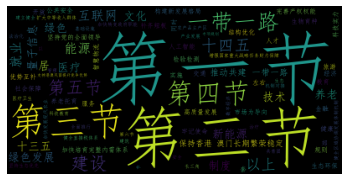

In [16]:
text = open('NewsAnalysis/145.txt','r',encoding='utf-8').read()
font = r'c:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

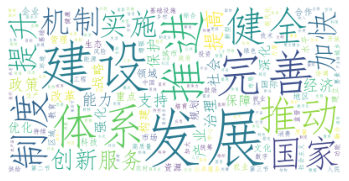

In [17]:
wcdata = {}
for d in data:
    wcdata[d[1]] = d[0]
text = open('NewsAnalysis/145.txt','r',encoding='utf-8').read()
font = r'c:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font,background_color='white').generate_from_frequencies(wcdata)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [47]:
wc.to_file(r'NewsAnalysis\145.jpg')

In [48]:
import os
print(os.getcwd())

C:\Users\Administrator\AppData\Local\Programs\Python\Python38\Scripts


In [18]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator

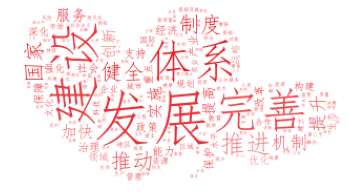

In [20]:
mask = np.array(Image.open('NewsAnalysis\heart.png'))
image_colors = ImageColorGenerator(mask)

wcdata={}
for d in data:
    wcdata[d[1]]=d[0]

text = open('NewsAnalysis/145.txt','r',encoding='utf-8').read()
font = r'c:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font,background_color='white',mask=mask).generate_from_frequencies(wcdata)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()

## 3.读取数据库内容并制作词云

In [19]:
import pandas as pd
import pymysql

In [38]:
db = pymysql.connect("localhost","root","密码","数据库名",charset="utf8")
cursor = db.cursor()
try:
    #content = cursor.execute('select * from cucnews limit 10')
    content = pd.read_sql('select content from cucnews',db)
    db.commit()
except:
    print('数据库连接错误！')
    db.rollback()
db.close()

In [39]:
content.head()

,content
0,（通讯员 李林）为确保学生顺利返校，3月12日上午，校党委副书记李众、副校长李新军带队来到中...
1,（通讯员 孟宁）为贯彻本科教育大会精神，推进本科教育改革落实落地，3月11日下午，教务处组织...
2,（通讯员 郇瓛 摄影 王雷亭）3月11日上午，学校召开巡察工作领导小组会议。党委书记、校长、...
3,（通讯员 刘兆杰 摄影 刘兆杰 周子颜）为深入学习贯彻2021年春季工作会会议精神，对标对表...
4,（通讯员 王珏 闫蕾）近日，在科学研究处的积极推进下，我校持续引入中国共产党思想理论资源数据...


In [40]:
text = str()
for i in range(len(content)):
    text = text + content['content'][i]
text

'（通讯员\xa0李林）为确保学生顺利返校，3月12日上午，校党委副书记李众、副校长李新军带队来到中蓝学生公寓、梆子井学生公寓、梆子井地下书库、国重大楼、图书馆、星光超市和博学楼等地开展校园安全检查。在学生公寓，两位校领导详细询问中蓝公寓的电梯维保情况，并乘坐试验。他们检查了超市、商铺的经营准备进展，查看商品储备、保质期限和商品价格情况，要求经营者严格按照经营范围营业，认真落实食品卫生安全和疫情防控要求，切实做好师生返校后的服务保障工作。校领导一行还来到快递投放点检查，听取国有资产管理处负责人对快递点管理措施及新快递点规划设置的工作汇报。在国重大楼，两位校领导认真听取相关负责人的工作汇报，询问安全隐患情况，要求严格落实各项安全措施，保障大楼安全。他们还详细了解了图书馆开学准备、疫情防控等情况，要求做好服务工作，为师生提供良好学习环境。在博学楼，两位校领导实地查看开学准备和安全工作，详细了解楼内消防系统运转情况，并要求定期维护各类设施，确保正常运行，做好教学保障服务。对于工作中发现的安全隐患，两位校领导要求相关部门立即整改落实，并对各自负责领域再次开展全面细致的安全隐患自查，及时整改，确保学生顺利返校和校园安全稳定。校领导还对管理工作提出了优化方案，要求相关部门认真落实。本次安全检查工作由保卫部（处）牵头，学生工作部（处）、后勤保障处、信息化处、国有资产管理处、实验室与设备管理处、校园建设处、协同创新中心等单位相关负责人一同参加。（编辑 王雷亭）（通讯员 孟宁）为贯彻本科教育大会精神，推进本科教育改革落实落地，3月11日下午，教务处组织召开新学期首次本科教育发展专家研讨会。来自各学院的教师代表、本科教育发展指导专家路盛章、潘桦、吴敏苏、方毅华、金雪涛、付龙、王铉、康瑾、陆佳怡、杨雁鸿、胡洪春、颜巧容以及教务处部分老师参加了研讨。教务处处长王晓红首先介绍了我校本科教育发展专家指导组成立的背景，她表示，学校本科教育的发展离不开每一位常年奋斗在一线教师的积极参与，教师们的智慧与行动是本科教育教学发展最重要的内驱力，也是教务处在推进落实《中国传媒大学本科教育行动计划》进程中必须依靠的重要力量。教务处副处长贺小飞对本学期教学改革与发展的重点工作进行了解读，教务处将以人才培养方案为抓手，以课程资源建设为核心，以教材建设、慕课及微专业建设为重点，以教学学术养成为拓展，有计划、有体系

In [41]:
seg_list = jieba.cut(text,cut_all=False)

In [42]:
tf = {}
for seg in seg_list:
    if seg in tf:
        tf[seg]+=1
    else:
        tf[seg]=1
len(tf)

5002

In [43]:
ci = list(tf.keys())

In [44]:
with open('NewsAnalysis\cucnews_stopword.txt','r',encoding='utf-8') as ft:
    stopword = ft.read()

In [45]:
for seg in ci:
    if tf[seg]<10 or len(seg)<2 or seg in stopword or '一' in seg:
        tf.pop(seg)

len(tf)

376

In [46]:
ci = list(tf.keys())
num = list(tf.values())

data = []
for i in range(len(tf)):
    data.append((num[i],ci[i]))

data.sort()
data.reverse()
data

[(332, '工作'),
 (311, '发展'),
 (282, '学校'),
 (230, '中国'),
 (205, '建设'),
 (173, '报告'),
 (130, '传媒大学'),
 (124, '党委'),
 (121, '代表'),
 (117, '学习'),
 (113, '学院'),
 (106, '书记'),
 (105, '教育'),
 (91, '特色'),
 (78, '精神'),
 (77, '大会'),
 (76, '学生'),
 (75, '未来'),
 (75, '创新'),
 (74, '教学'),
 (74, '我校'),
 (74, '党代会'),
 (69, '合作'),
 (68, '融合'),
 (65, '世界'),
 (65, '专业'),
 (64, '服务'),
 (64, '国家'),
 (63, '传媒'),
 (61, '提出'),
 (60, '重点'),
 (60, '目标'),
 (59, '传播'),
 (59, '会议'),
 (58, '教授'),
 (58, '情况'),
 (56, '阎玺'),
 (55, '落实'),
 (55, '时代'),
 (55, '媒体'),
 (54, '课程'),
 (54, '政治'),
 (51, '战略'),
 (49, '推进'),
 (48, '文化'),
 (48, '改革'),
 (48, '中心'),
 (47, '规划'),
 (47, '巡察'),
 (46, '本科'),
 (46, '2021'),
 (45, '廖祥忠'),
 (44, '高质量'),
 (44, '管理'),
 (44, '中传'),
 (43, '领域'),
 (42, '指出'),
 (41, '教师'),
 (40, '研究'),
 (39, '系统'),
 (38, '部署'),
 (38, '提供'),
 (38, '2020'),
 (37, '思想'),
 (37, '实践'),
 (37, '国际'),
 (36, '智能'),
 (36, '实验室'),
 (36, '做好'),
 (36, '交流'),
 (35, '第三次'),
 (35, '师生'),
 (35, '副校长'),
 (34, '科研'),
 (34, '校园'),


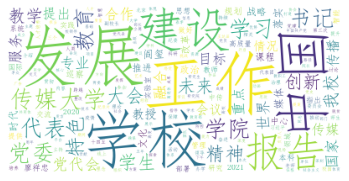

In [50]:
wcdata = {}
for d in data:
    wcdata[d[1]] = d[0]
font = r'c:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font,background_color='white').generate_from_frequencies(wcdata)
plt.imshow(wc)
plt.axis('off')
plt.show()